In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore") #supress warnings for readability

In [2]:
#import data files
df = pd.read_csv('FanGraphs Leaderboard-4.csv')
df.head()

,Team,IP,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,ERA,xERA
0,LAD,1451.1,3918,87.4,114.4,14.4,255,6.5%,1336,34.1%,2.80,NaN
1,MIL,1446.0,3939,87.7,118.4,11.9,268,6.8%,1427,36.2%,3.83,NaN
2,PHI,1428.1,4052,87.8,115.9,11.7,294,7.3%,1430,35.3%,3.98,NaN
3,TBR,1435.2,4096,87.8,118.8,13.4,301,7.3%,1464,35.7%,3.41,NaN
4,NYY,1451.2,3970,87.9,117.3,12.4,263,6.6%,1429,36.0%,3.30,NaN


In [3]:
pf = pd.read_csv('FG F.csv')
pf.head()

,Team,Inn,rSZ,rCERA,rSB,rGDP,rARM,rGFP,rPM,rTS,...,ARM,DPR,RngR,ErrR,UZR,UZR/150,FRM,OAA,RAA,Def
0,NYY,13065.0,20,1,5,-2,7,8,62,25,...,15.1,-2.5,11.0,6.5,30.1,7.0,24.5,21,16,42.9
1,ARI,12870.0,-15,3,2,-5,5,0,29,33,...,1.5,-2.2,35.8,-1.3,33.9,4.4,-6.4,44,38,41.4
2,STL,12921.0,-8,3,-1,2,8,12,34,11,...,7.6,2.8,10.0,21.8,42.1,6.1,-3.4,24,18,32.0
3,HOU,13008.0,-1,0,0,5,5,8,15,44,...,8.2,0.4,14.1,-5.2,17.5,5.0,-2.9,31,26,31.8
4,CLE,13104.0,3,2,-1,-1,11,2,46,22,...,5.9,1.2,18.5,9.1,34.8,5.1,3.7,19,15,18.8


In [4]:
#find null values
df.isnull().sum()



Team         0
IP           0
Events       0
EV           0
maxEV        0
LA           0
Barrels      0
Barrel%      0
HardHit      0
HardHit%     0
ERA          0
xERA        30
dtype: int64

In [5]:
pf.isnull().sum()

Team       0
Inn        0
rSZ        0
rCERA      0
rSB        0
rGDP       0
rARM       0
rGFP       0
rPM        0
rTS        0
DRS        0
ARM        0
DPR        0
RngR       0
ErrR       0
UZR        0
UZR/150    0
FRM        0
OAA        0
RAA        0
Def        0
dtype: int64

In [6]:
dft = df[['Team','EV','ERA']]
pft = pf[['Team','DRS','UZR/150','OAA']]

In [7]:
#Combine the two dataframes 
md = pd.merge(left=dft, right=pft, left_on='Team', right_on='Team')

md

,Team,EV,ERA,DRS,UZR/150,OAA
0,LAD,87.4,2.80,86,2.9,9
1,MIL,87.7,3.83,53,0.6,5
2,PHI,87.8,3.98,-33,-2.1,-37
3,TBR,87.8,3.41,15,-1.0,2
4,NYY,87.9,3.30,129,7.0,21
5,ATL,88.1,3.46,31,-5.1,6
6,NYM,88.1,3.58,13,-3.7,10
7,MIA,88.3,3.87,11,2.0,5
8,CHC,88.3,4.03,4,1.3,-25
9,STL,88.3,3.79,67,6.1,24


<AxesSubplot: >

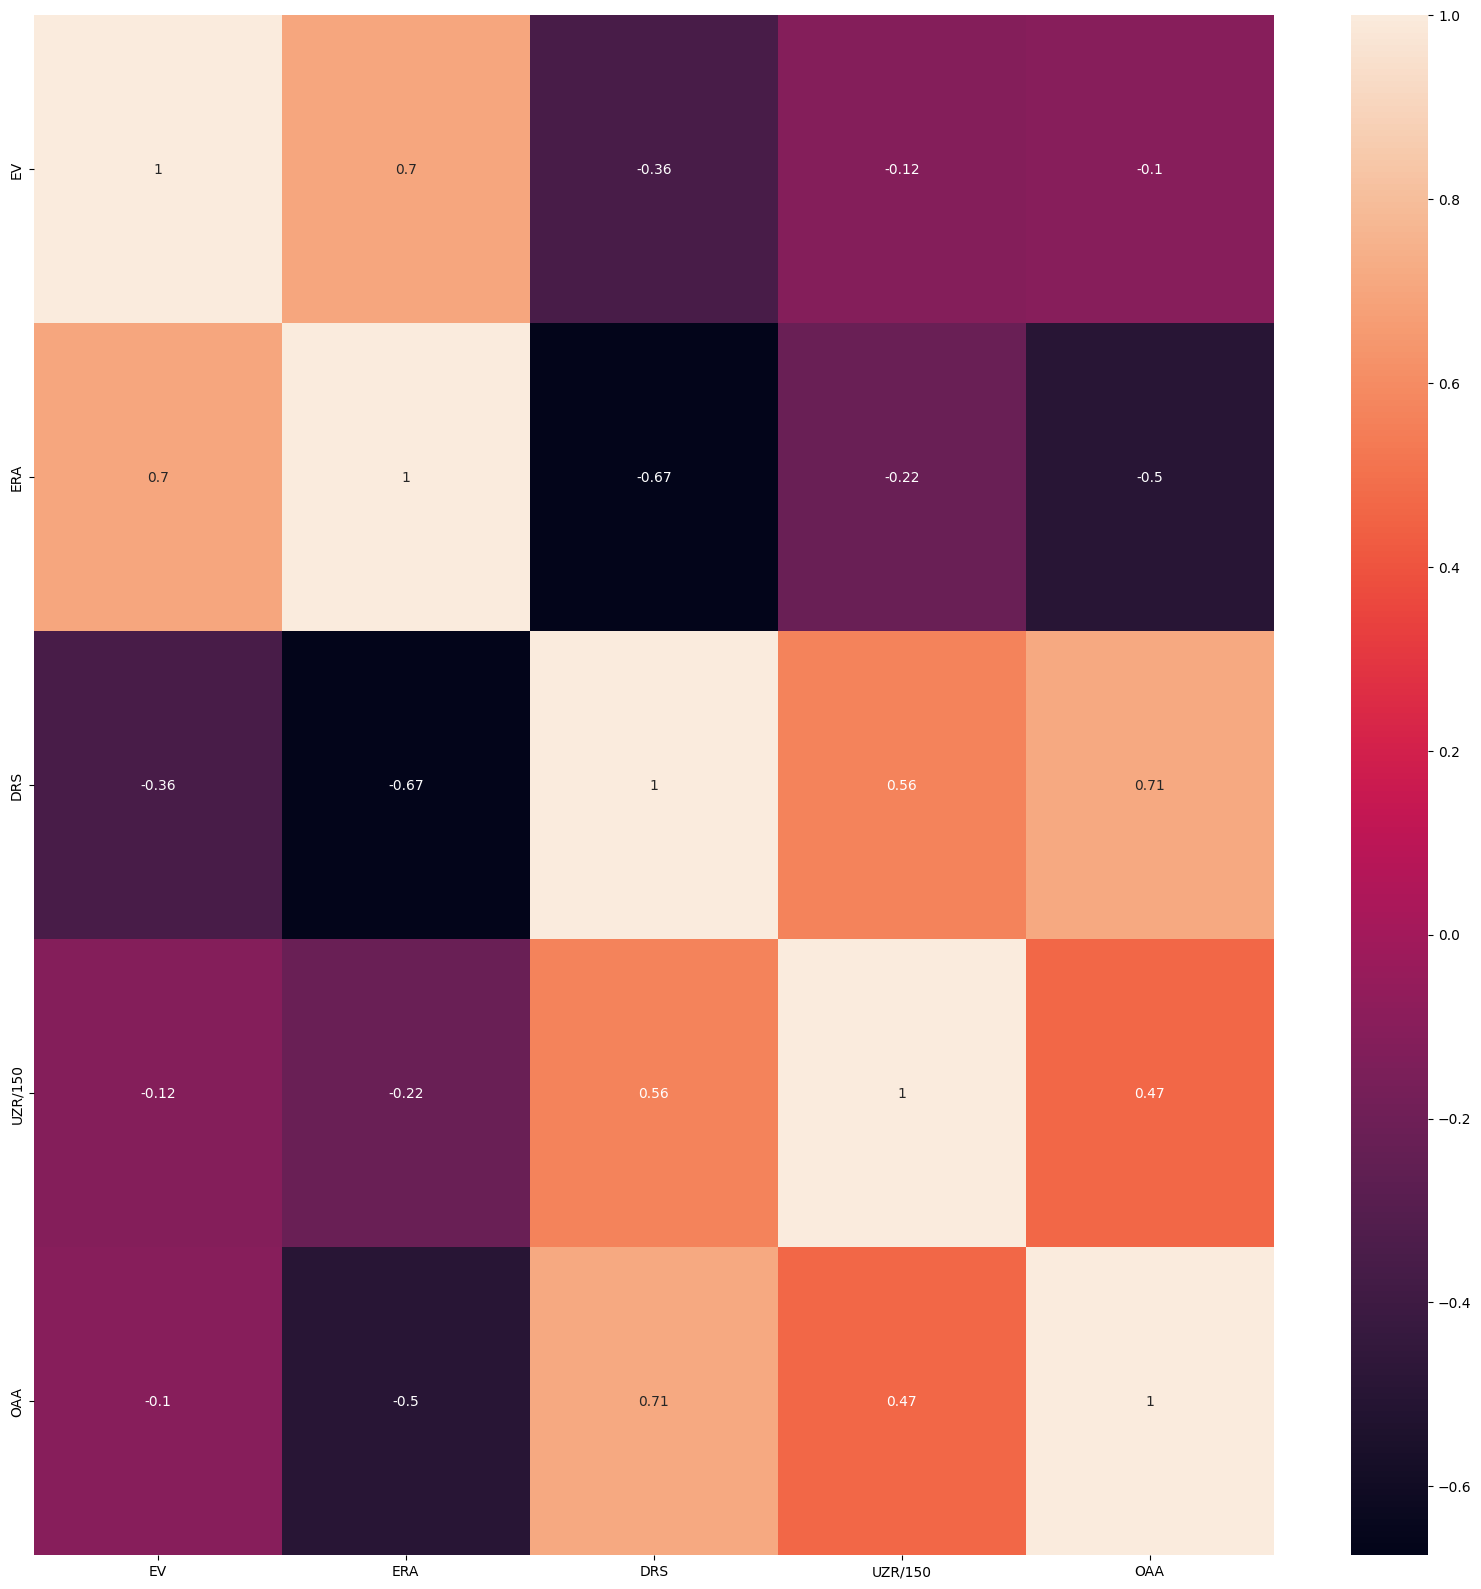

In [8]:
#correlation matrix
md.corr()
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(md.corr(), annot=True)

In [22]:
#sort columns
mg=md.sort_values('EV',ascending=False)
mg

,Team,EV,ERA,DRS,UZR/150,OAA
28,COL,89.5,5.08,9,0.5,-2
27,DET,89.4,4.04,25,-2.4,12
26,WSN,89.3,5.00,-47,-0.8,-51
25,KCR,89.3,4.72,-40,2.6,1
24,BOS,89.2,4.53,-4,-2.3,-11
23,TOR,89.1,3.89,44,-6.7,6
22,CLE,89.0,3.47,79,5.1,19
21,OAK,88.9,4.54,-29,-1.7,-4
20,BAL,88.8,3.97,36,3.8,2
19,TEX,88.8,4.22,5,0.3,-5


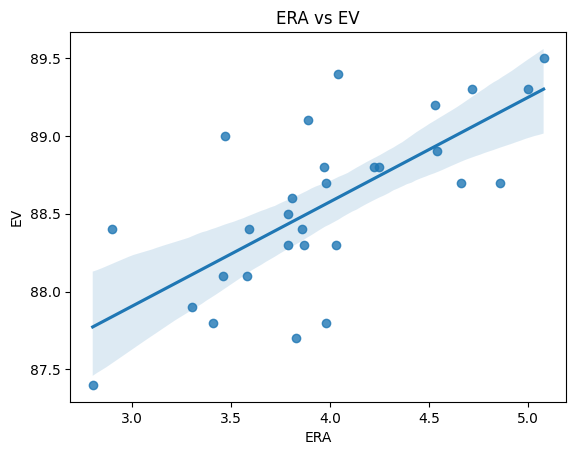

In [28]:


#scatterplot with trendline
sns.regplot(x='ERA',y='EV',data=mg)
plt.title('ERA vs EV')
plt.show()

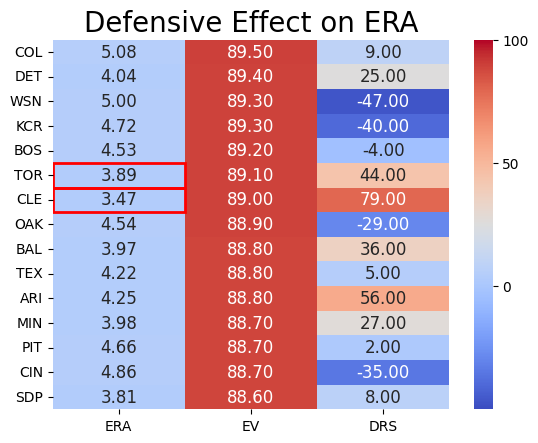

In [62]:

#creat heatmap
hp = sns.heatmap(mg.head(15)[['ERA','EV','DRS']], annot=True, annot_kws={'size': 12},fmt=".2f",vmin=-50, vmax=100, cmap='coolwarm',cbar_kws={'ticks': [0, 50, 100]})
hp.set_yticklabels(mg['Team'].head(15), rotation=0)
hp.set_title('Defensive Effect on ERA', fontsize=20)
#highlight the ERA for TOR and CLE in the heatmap
hp.add_patch(plt.Rectangle((0, 5), 1, 1, fill=False, edgecolor='red', lw=2))
hp.add_patch(plt.Rectangle((0, 6), 1, 1, fill=False, edgecolor='red', lw=2))
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcf486fd-3635-454a-bace-c29052f471ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>